In [1]:
import pandas as pd
import numpy as np 

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Arvind-Hrishikesh/Heart-Failure-Analysis-and-Prediction/main/heart_failure_clinical_records_dataset.csv')
df1_copy=df1.copy()

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


These are the modifications to dataset

1)Convert datatype of Age column to int.

2)Change values of anaemia,diabetes,high_blood_pressure,smoking and death event columns to boolean for ease of reading.

3)Change the value of sex column to male or female

4)Drop time(follow up month) column as it is not required for analysis.

5)Convert the platelet-count into kilo-platelets/mcL.


In [4]:
df1.age = df1.age.astype(int)
df1[['anaemia','diabetes','high_blood_pressure', 'smoking', 'DEATH_EVENT']] = df1[['anaemia','diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']].astype(bool)
df1['sex'] = np.where(df1['sex'] == 1, 'Male','Female')
df1.drop(['time'],axis=1, inplace =True, errors = 'ignore')
df1.platelets = (df1. platelets/1000).astype(int)

In [5]:
#Modified dataset
df1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75,False,582,False,20,True,265,1.9,130,Male,False,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,61,True,38,True,155,1.1,143,Male,True,False
295,55,False,1820,False,38,False,270,1.2,139,Female,False,False
296,45,False,2060,True,60,False,742,0.8,138,Female,False,False
297,45,False,2413,False,38,False,140,1.4,140,Male,True,False


In [6]:
#Checking for null values in dataset
df1.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
DEATH_EVENT                 False
dtype: bool

In [7]:
#Basic info about the dataset
df1.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,581.839465,38.083612,263.327759,1.39388,136.625418
std,11.894997,970.287881,11.834841,97.805105,1.03451,4.412477
min,40.000000,23.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850.000000,9.40000,148.000000


Here we see huge standard deviations with respect to mean for creatine_phosphokinase(CKP) indicating errors in recording values for this column. The maximum value of CKP found in a heart failure patient was around 600 micrograms per liter.

In [8]:
df1[df1.creatinine_phosphokinase > 1000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 297
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       36 non-null     int64  
 1   anaemia                   36 non-null     bool   
 2   creatinine_phosphokinase  36 non-null     int64  
 3   diabetes                  36 non-null     bool   
 4   ejection_fraction         36 non-null     int64  
 5   high_blood_pressure       36 non-null     bool   
 6   platelets                 36 non-null     int64  
 7   serum_creatinine          36 non-null     float64
 8   serum_sodium              36 non-null     int64  
 9   sex                       36 non-null     object 
 10  smoking                   36 non-null     bool   
 11  DEATH_EVENT               36 non-null     bool   
dtypes: bool(5), float64(1), int64(5), object(1)
memory usage: 2.4+ KB


The normal value of CPK ranges from 10 to 120 micrograms per liter, but around 36 patients have CPK level > 1000. These were considered outliers and dropped.


In [9]:
df1.drop('creatinine_phosphokinase', inplace = True, axis = 1, errors ='ignore')

In [10]:
# Showing details regarding the columns

column_details_df = pd.read_html("https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1 ")[0]
#to drop the unnecessary column
column_details_df.drop('Range', axis =1,inplace = True, errors='ignore' )
#to drop the unnecessary rows
column_details_df.drop([3,4,7,13], axis = 0, inplace =True, errors ='ignore')
#to rename the column names
column_details_df.columns = ['feature', 'explanation', 'measurement_unit']

column_details_df = column_details_df.reindex([0,1,5,6,2,9,10,11,8,12,14])
column_details_df.feature = df1.columns

column_details_df.set_index(['feature'], inplace =True)

column_details_df['explanation']['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'] = ['True, if the patient has Anaemia',
                                                                                                                                                      'True, if the patient has Diabetes', 
                                                                                                                                                      '% of blood leaving the heart at each contraction', 
                                                                                                                                                      'True, if the patient has High blood pressure', 
                                                                                                                                                      'Amount of platelets in the blood', 
                                                                                                                                                      'Male or Female',
                                                                                                                                                      'True, if the patient smokes', 
                                                                                                                                                      'True, if the patient died during the follow-up period']

column_details_df.measurement_unit['sex', 'platelets','serum_creatinine','serum_sodium'] = ['Boolean',
                                                                                            'kilo-platelets / mcL (microliter)', 
                                                                                            'mg/dL (milligrams per deciliter)', 
                                                                                            'mEq/L (milliequivalents per litre)']


column_details_df['normal_value'] = ['None', 
                                     'None', 
                                     'None',
                                     '55% - 70%',
                                     'None', 
                                     '150 - 400 kilo-platelets / mcL', 
                                     '0.6 - 1.2 mg/dL', 
                                     '135 - 145 mEq /L', 
                                     'None', 'None', 'None']
                                    
column_details_df                                                                                          

,explanation,measurement_unit,normal_value
feature,,,
age,Age of the patient,Years,None
anaemia,"True, if the patient has Anaemia",Boolean,None
diabetes,"True, if the patient has Diabetes",Boolean,None
ejection_fraction,% of blood leaving the heart at each contraction,Percentage,55% - 70%
high_blood_pressure,"True, if the patient has High blood pressure",Boolean,None
platelets,Amount of platelets in the blood,kilo-platelets / mcL (microliter),150 - 400 kilo-platelets / mcL
serum_creatinine,Level of creatinine in the blood,mg/dL (milligrams per deciliter),0.6 - 1.2 mg/dL
serum_sodium,Level of sodium in the blood,mEq/L (milliequivalents per litre),135 - 145 mEq /L
sex,Male or Female,Boolean,None


Datasets have been cleaned and prepared for analysis

In [11]:
#Number of male and female patients in this analysis
df1.sex.value_counts()

Male      194
Female    105
Name: sex, dtype: int64

In [12]:
#Statistics of male and female patients with anaemia
df1.groupby(['anaemia', 'sex']).size().reset_index().pivot(columns= 'anaemia',index = 'sex', values=0) 

anaemia,False,True
sex,,
Female,53,52
Male,117,77


In [13]:
#Statistics of male and female patients with diabetes
df1.groupby(['diabetes', 'sex']).size().reset_index().pivot(columns= 'diabetes',index = 'sex', values=0) 

diabetes,False,True
sex,,
Female,50,55
Male,124,70


In [14]:
##Statistics of male and female patients with high blood pressure
df1.groupby(['high_blood_pressure', 'sex']).size().reset_index().pivot(columns= 'high_blood_pressure',index = 'sex', values=0) 

high_blood_pressure,False,True
sex,,
Female,61,44
Male,133,61


In [15]:
#Statistics of male and female patients with smoking habit
df1.groupby(['smoking', 'sex']).size().reset_index().pivot(columns= 'smoking',index = 'sex', values=0) 

smoking,False,True
sex,,
Female,101,4
Male,102,92


In [16]:
#Statistics of male and female patients who died during follow up period 
df1.groupby(['DEATH_EVENT', 'sex']).size().reset_index().pivot(columns= 'DEATH_EVENT',index = 'sex', values=0) 


DEATH_EVENT,False,True
sex,,
Female,71,34
Male,132,62


In [17]:
#Number of  patients with abnormal ejection fraction
abnormal_ef = df1[(df1.ejection_fraction < 55) | (df1.ejection_fraction >70)]
print("Total number of patients with abnormal ejection fraction : {}.".format(len(abnormal_ef)))

Total number of patients with abnormal ejection fraction : 261.


In [18]:
#Number of  patients with abnormal platelets count
abnormal_platelets = df1[(df1.platelets < 150) | (df1.platelets >400)]
print("Total number of patients with abnormal platelets count : {}.".format(len(abnormal_platelets)))

Total number of patients with abnormal platelets count : 47.


In [19]:
#Number of  patients with abnormal creatine level
abnormal_creatinine = df1[(df1.serum_creatinine < 0.6) | (df1.serum_creatinine >1.2)]
print("Total number of patients with abnormal creatine level : {}.".format(len(abnormal_creatinine)))

Total number of patients with abnormal creatine level : 102.


In [20]:
##Number of  patients with abnormal sodium level
abnormal_sodium = df1[(df1.serum_sodium < 135) | (df1.serum_sodium >145)]
print("Total number of patients with abnormal sodium level : {}.".format(len(abnormal_sodium)))

Total number of patients with abnormal sodium level : 85.


Exploratory Data analysis and Visualisation

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#set some default style for our graphs
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

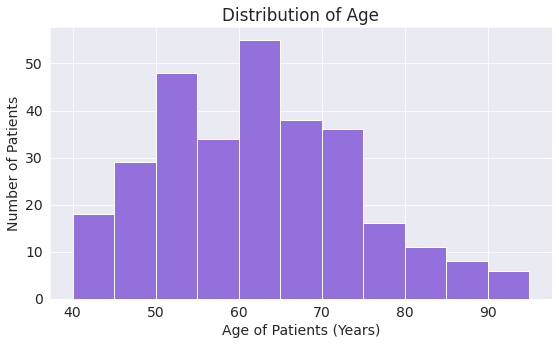

In [22]:
#Distribution of age of the heart failure patients
plt.hist(df1.age, bins=np.arange(40,100, 5), color ='mediumpurple')
plt.xlabel("Age of Patients (Years)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Age");

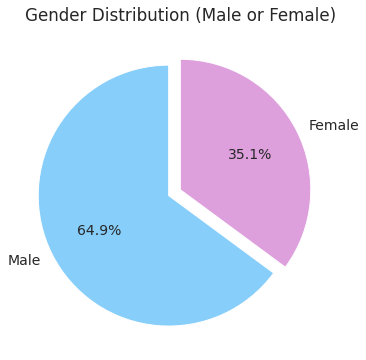

In [23]:
#Distribution of gender of the Heart Failure patients
gender_counts = df1.sex.value_counts()
plt.figure(figsize=(12, 6))
plt.pie(gender_counts, labels = gender_counts.index, autopct ='%.1f%%', startangle = 90, explode = [0.1, 0], colors = ['lightskyblue', 'plum'])
plt.title("Gender Distribution (Male or Female)");

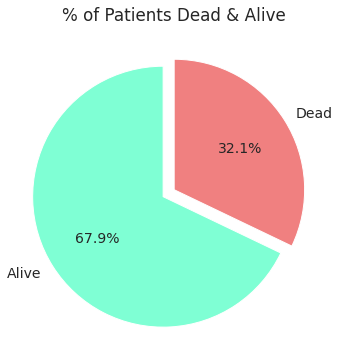

In [24]:
#Death rate among patients
dead_counts = df1.DEATH_EVENT.value_counts()
plt.figure(figsize=(12, 6))
plt.pie(dead_counts, labels = ['Alive', 'Dead'] , autopct ='%.1f%%', startangle = 90, explode=[0.1, 0], colors =['aquamarine', 'lightcoral'])
plt.title("% of Patients Dead & Alive");

This data is however skewed since more number of patients might have died due after the time frame of recording data

In [25]:
def create_range_series(number_series):
    """Creates a series with range(group) for the numeric values 
    provided in another series which is passed as an argument.
    This function takes only one argument which is (Pandas) series object, 
    returns another (Pandas) series object. 
    
    Argument:
        number_series - A column in pandas data frame with numeric values. 
    """
    condition = [
    (number_series >= 0) & (number_series < 5), 
    (number_series >= 5) & (number_series < 10), 
    (number_series >= 10) & (number_series < 15), 
    (number_series >= 15) & (number_series < 20), 
    (number_series >= 20) & (number_series < 25), 
    (number_series >= 25) & (number_series < 30), 
    (number_series >= 30) & (number_series < 35), 
    (number_series >= 35) & (number_series < 40), 
    (number_series >= 40) & (number_series < 45), 
    (number_series >= 45) & (number_series < 50), 
    (number_series >= 50) & (number_series < 55), 
    (number_series >= 55) & (number_series < 60), 
    (number_series >= 60) & (number_series < 65), 
    (number_series >= 65) & (number_series < 70), 
    (number_series >= 70) & (number_series < 75), 
    (number_series >= 75) & (number_series < 80), 
    (number_series >= 80) & (number_series < 85), 
    (number_series >= 85) & (number_series < 90), 
    (number_series >= 90) & (number_series < 95), 
    (number_series >= 95) & (number_series < 100)
    ]
    
    output = ['0-5', 
              '5-10', 
              '10-15', 
              '15-20', 
              '20-25', 
              '25-30', 
              '30-35', 
              '35-40', 
              '40-45', 
              '45-50', 
              '50-55', 
              '55-60', 
              '60-65', 
              '65-70', 
              '70-75', 
              '75-80', 
              '80-85', 
              '85-90', 
              '90-95', 
              '95-100'
              ] 
    result = np.select(condition, output, '>100')
    return pd.Series(result)

In [26]:
#Create a column with age group 
df1['age_group'] = create_range_series(df1.age)
df1

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,age_group
0,75,False,False,20,True,265,1.9,130,Male,False,True,75-80
1,55,False,False,38,False,263,1.1,136,Male,False,True,55-60
2,65,False,False,20,False,162,1.3,129,Male,True,True,65-70
3,50,True,False,20,False,210,1.9,137,Male,False,True,50-55
4,65,True,True,20,False,327,2.7,116,Female,False,True,65-70
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,True,38,True,155,1.1,143,Male,True,False,60-65
295,55,False,False,38,False,270,1.2,139,Female,False,False,55-60
296,45,False,True,60,False,742,0.8,138,Female,False,False,45-50
297,45,False,False,38,False,140,1.4,140,Male,True,False,45-50


In [27]:
dead_patients = df1[df1.DEATH_EVENT == True].groupby('age_group').count()
alive_patients = df1[df1.DEATH_EVENT == False].groupby('age_group').count()

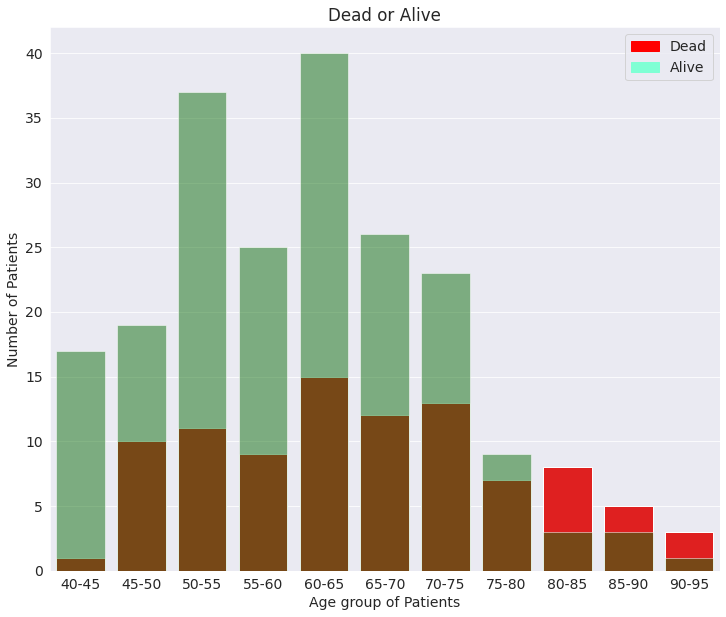

In [39]:
plt.figure(figsize=(12,10))
sns.barplot(x = dead_patients.index , y = dead_patients.DEATH_EVENT, alpha=1, palette =['red'])
sns.barplot(x = alive_patients.index, y = alive_patients.DEATH_EVENT, alpha = 0.5, palette = ['green'], estimator=sum, ci=None )
plt.title('Dead or Alive')
plt.xlabel('Age group of Patients')
dead = mpatches.Patch(color= 'red', label='Dead')
alive = mpatches.Patch(color='aquamarine', label='Alive')
plt.legend(handles=[dead, alive])
plt.ylabel('Number of Patients');

As we can clearly see, that there are more number of patients died (during the follow-up period) is in 60-65 age group (i.e 15 Patients). It's obvious, since we have more number of patients in 60-65 age group. And the proportion of patients died starts increasing from 65-70 age group and the number of patients died is more than alive patients in the age group of '80-85', '85-90' and '90-95'. This is because over the time, the body’s immune system naturally becomes less capable of handling new threats. This increases the risk of having issues with various illnesses which ultimately leads to their death.

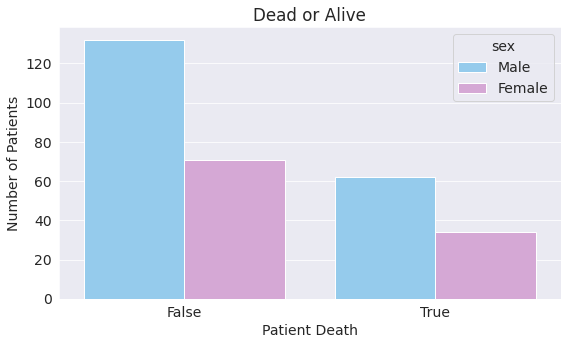

In [29]:
sns.countplot(x = df1.DEATH_EVENT, hue = df1.sex, palette =['lightskyblue', 'plum'])
plt.title('Dead or Alive')
plt.xlabel('Patient Death')
plt.ylabel('Number of Patients');

We have to analyze the number of patients having anaemia, diabetes, high blood pressure, smoking habit, abnormal ejection fraction, abnormal creatinine and sodium level.

So, let's create another column in our data frame to indicate the abnormalities of the various records.

In [30]:
#create columns to indicate abnormalities 
df1['abnormal_ef'] = np.where(((df1.ejection_fraction >= 55) & (df1.ejection_fraction <=70)) , 'Normal', 'Abormal')
df1['abnormal_platelets'] = np.where(((df1.platelets >= 150) & (df1.platelets <= 400)) , 'Normal', 'Abnormal')
df1['abnormal_creatinine'] = np.where(((df1.serum_creatinine >= 0.6) & (df1.serum_creatinine <= 1.2)), 'Normal','Abnormal')
df1['abnormal_sodium'] = np.where(((df1.serum_sodium >= 135) & (df1.serum_sodium <= 145)) , 'Normal', 'Abnormal')

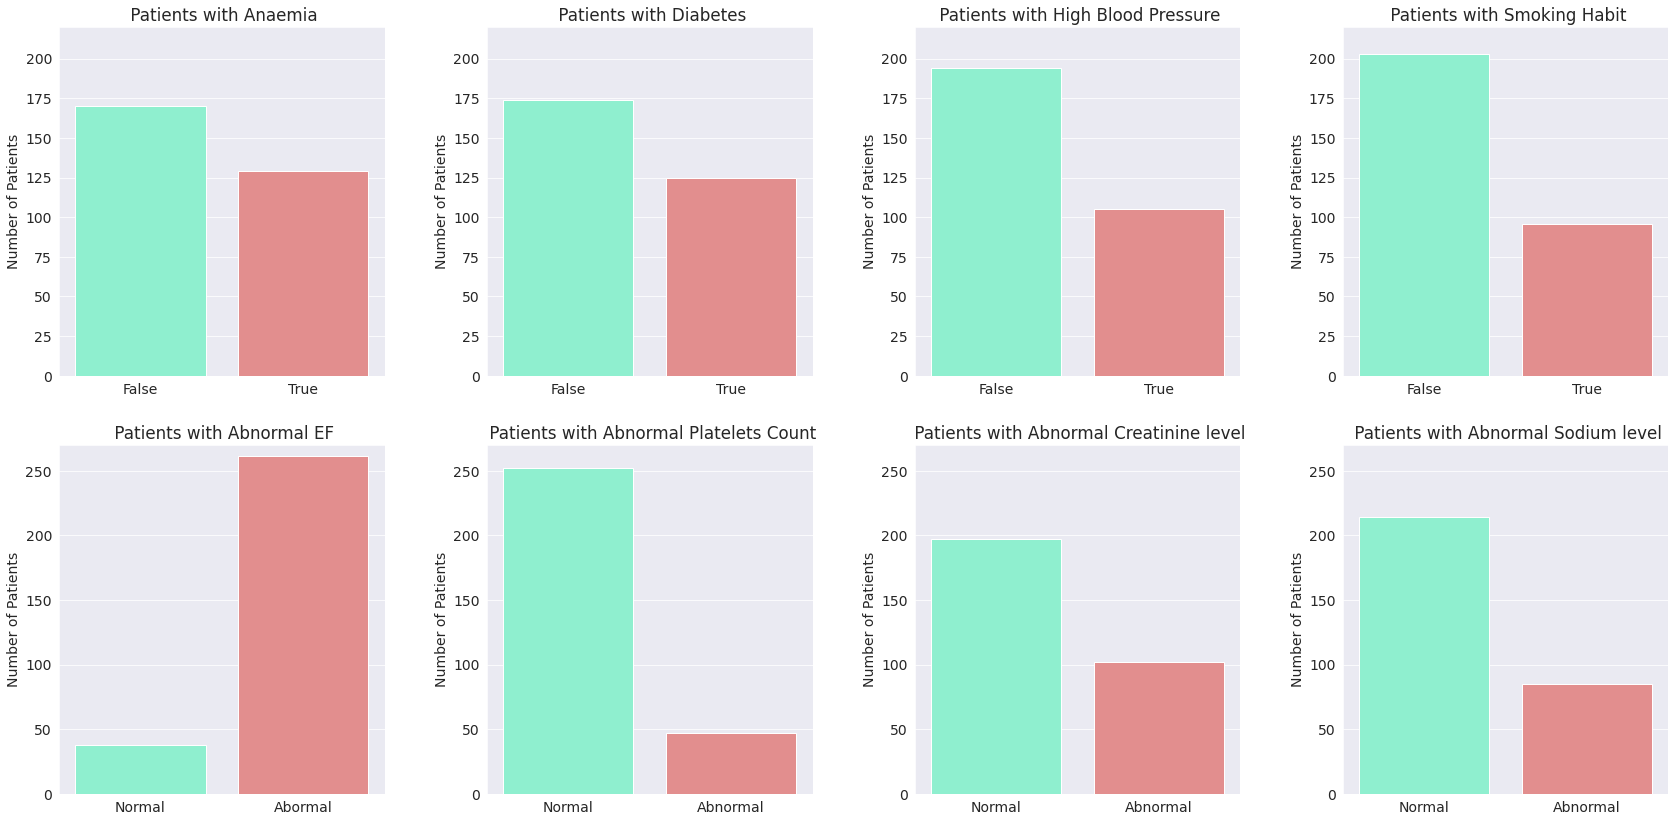

In [31]:
fig, axis = plt.subplots(2,4, figsize =(24, 12)) 
#axis(0,0) use this axis for Anaemia 
axis[0,0].set_title(" Patients with Anaemia")
sns.countplot(x = df1.anaemia, ax=axis[0,0], palette=['aquamarine', 'lightcoral'] )
axis[0,0].set_xlabel("")
axis[0,0].set_ylabel("Number of Patients")
axis[0,0].set_ylim([0, 220])

#axis(0,1) use this axis for Diabetes 
axis[0,1].set_title(" Patients with Diabetes")
sns.countplot(x = df1.diabetes, ax=axis[0,1], palette=['aquamarine', 'lightcoral'])
axis[0,1].set_xlabel("")
axis[0,1].set_ylabel("Number of Patients")
axis[0,1].set_ylim([0, 220])


#axis(0,2) use this axis for High blood pressure 
axis[0,2].set_title(" Patients with High Blood Pressure")
sns.countplot(x = df1.high_blood_pressure, ax=axis[0,2], palette=['aquamarine', 'lightcoral'])
axis[0,2].set_xlabel("")
axis[0,2].set_ylabel("Number of Patients")
axis[0,2].set_ylim([0, 220])

#axis(0,3) use this axis for smoking habit 
axis[0,3].set_title(" Patients with Smoking Habit")
sns.countplot(x = df1.smoking, ax=axis[0,3], palette=['aquamarine', 'lightcoral'])
axis[0,3].set_xlabel("")
axis[0,3].set_ylabel("Number of Patients")
axis[0,3].set_ylim([0, 220])


#axis(1,0) use this axis for Ejection Fraction 
axis[1,0].set_title(" Patients with Abnormal EF")
sns.countplot(x = df1.abnormal_ef.sort_values(ascending =False) , ax=axis[1,0], palette=['aquamarine', 'lightcoral'])
axis[1,0].set_xlabel("")
axis[1,0].set_ylabel("Number of Patients")
axis[1,0].set_ylim([0, 270])

#axis(1,1) use this axis for Platelets count 
axis[1,1].set_title(" Patients with Abnormal Platelets Count")
sns.countplot(x = df1.abnormal_platelets.sort_values(ascending =False) , ax=axis[1,1], palette=['aquamarine', 'lightcoral'])
axis[1,1].set_xlabel("")
axis[1,1].set_ylabel("Number of Patients")
axis[1,1].set_ylim([0, 270])

#axis(1,2) use this axis for Creatinine level 
axis[1,2].set_title(" Patients with Abnormal Creatinine level")
sns.countplot(x = df1.abnormal_creatinine.sort_values(ascending =False), ax=axis[1,2], palette=['aquamarine', 'lightcoral'])
axis[1,2].set_xlabel("")
axis[1,2].set_ylabel("Number of Patients")
axis[1,2].set_ylim([0, 270])

#axis(1,3) use this axis for sodium level
axis[1,3].set_title(" Patients with Abnormal Sodium level")
sns.countplot(x = df1.abnormal_sodium.sort_values(ascending =False), ax=axis[1,3], palette=['aquamarine', 'lightcoral'])
axis[1,3].set_xlabel("")
axis[1,3].set_ylabel("Number of Patients")
axis[1,3].set_ylim([0, 270])

#to provide spacing between adjacent plots
plt.tight_layout(pad=2);

As we can clearly identify, that abnormality in Ejection Fraction(EF) is the most common factor among the heart failure patients.

"EF refers to the amount of blood being pumped out of the left ventricle each time it contracts. The left ventricle is the heart's main pumping chamber. Heart failure (HF) occurs when the heart cannot pump enough blood to meet the needs of the body".

Low EF is one of the primary reasons which causes heart failure, that's the reason we have more number of patients with abnormal Ejection Fraction.

Abnormal Ejection Fraction is followed by the abnormal creatinine and sodium level, the factor which is least common among the heart failure patients is abnormal Platelets Count (i.e only 47 Patients).

Number of Patients with Anaemia, Diabetes and High Blood Pressure are almost equal and ranges from 100 - 120 Patients.

**Pair wise relationship**

In [32]:
#filter columns with numeric value
numeric_column = df1[['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]

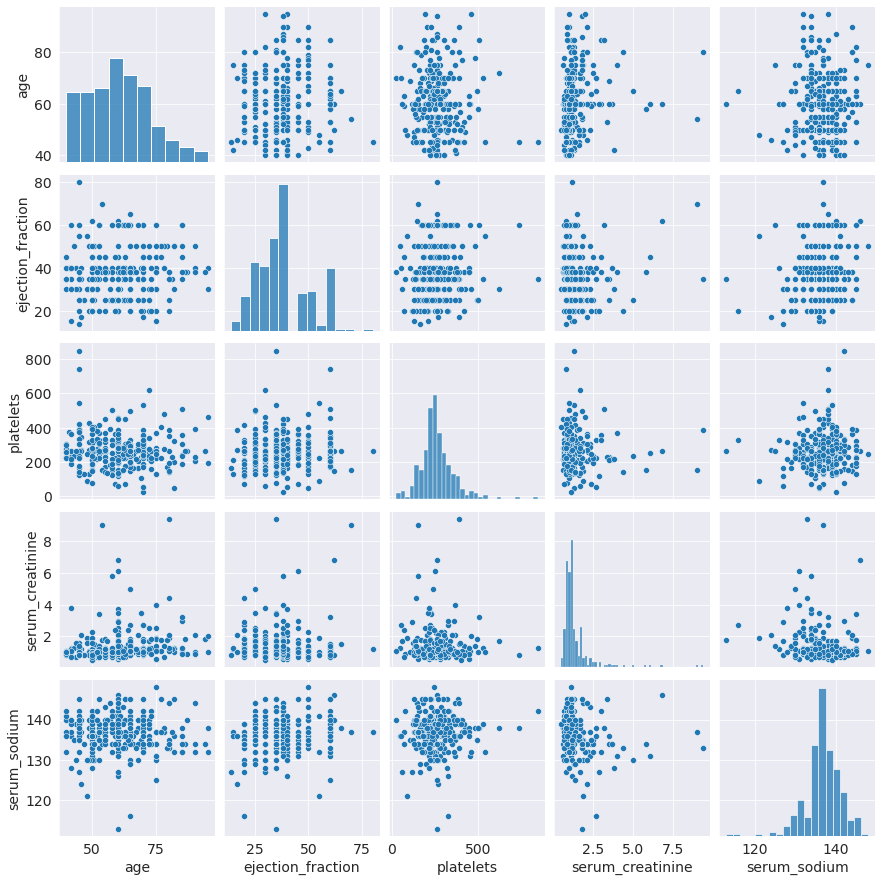

In [33]:
sns.pairplot(numeric_column);

**Attributes - Distribution**

Let's build distribution plot for all columns with numeric values.

Distribution plot helps us to find whether the variables are normally distributed or skewed.

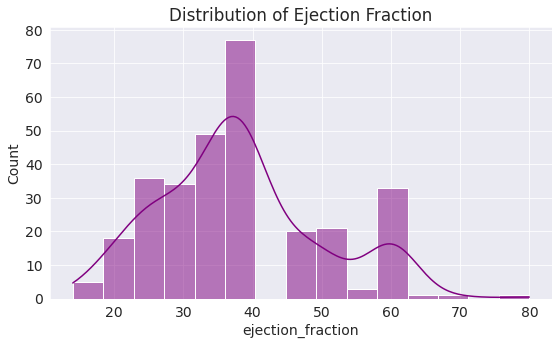

In [34]:
plt.title("Distribution of Ejection Fraction")
sns.histplot(df1.ejection_fraction, kde = True, color ='purple');

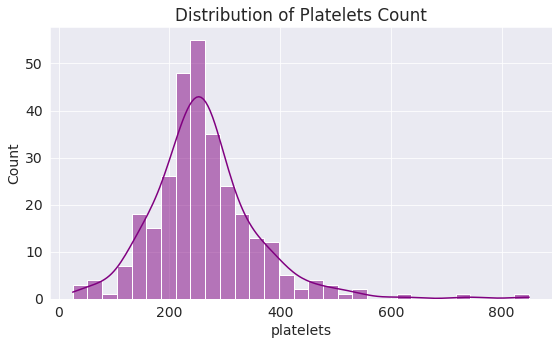

In [35]:
plt.title("Distribution of Platelets Count") 
sns.histplot(df1.platelets, kde = True, color ='purple');

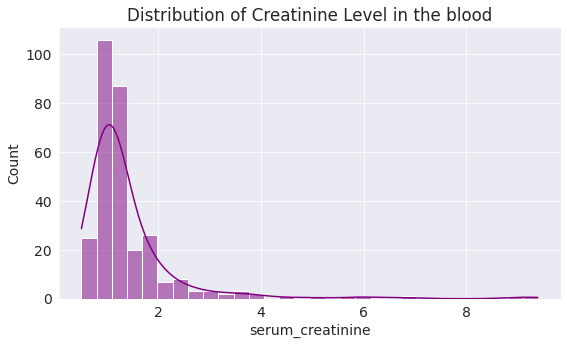

In [36]:
plt.title("Distribution of Creatinine Level in the blood") 
sns.histplot(df1.serum_creatinine, kde = True, bins = 30, color ='purple');

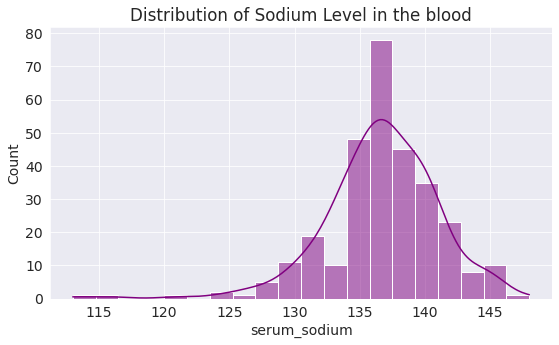

In [37]:
plt.title("Distribution of Sodium Level in the blood") 
sns.histplot(df1.serum_sodium, kde = True, color ='purple');

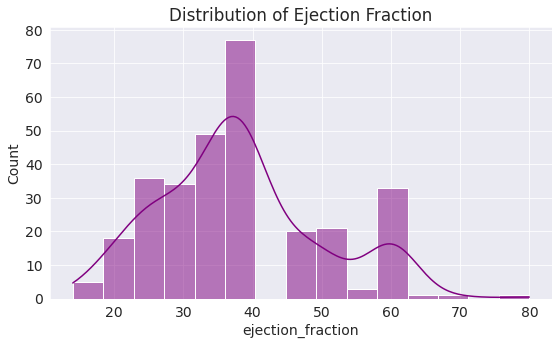

In [38]:
plt.title("Distribution of Ejection Fraction")
sns.histplot(df1.ejection_fraction, kde = True, color ='purple');

Now that we have plotted distribution plot for platelets count, creatinine level, sodium level and ejection fraction and it's obvious that no values are normally distributed. Platelets count, Ejection Fraction and Creatinine Level are right skewed and Sodium Level is left skewed. If the skewness in the data is more, we may have to perform some modifications, in order to get better results from the Machine Learning models once we train them.